LOADING THE DATASET AND FIND SHAPES AND HEAD()


In [2]:
import pandas as pd
trades_path = '/content/drive/MyDrive/Colab Notebooks/ds_abirami/csv_files/historical_data.csv'
sentiment_path = '/content/drive/MyDrive/Colab Notebooks/ds_abirami/csv_files/fear_greed_index.csv'
# Load data
trades = pd.read_csv(trades_path)
sentiment = pd.read_csv(sentiment_path)
print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)
trades.head(), sentiment.head()

Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

DATA PREPROCESSING - HANDLING NULL AND MISSING VALUES AND CONVERT TIME AND DATE



In [5]:
# Check missing values
print(trades.isnull().sum())
print(sentiment.isnull().sum())
# Drop nulls
trades = trades.dropna()
sentiment = sentiment.dropna()
# Clean column names (remove spaces if any)
trades.columns = trades.columns.str.strip()
sentiment.columns = sentiment.columns.str.strip()

# Convert trades time
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    errors='coerce',
    dayfirst=True
)
# Create Date in trades
trades['Date'] = trades['Timestamp IST'].dt.date
trades['Date'] = pd.to_datetime(trades['Date'])
# Convert sentiment date
sentiment['date'] = pd.to_datetime(
    sentiment['date'],
    errors='coerce'
)
# Rename sentiment
sentiment = sentiment.rename(columns={'date':'Date'})
# Drop invalid dates
trades = trades.dropna(subset=['Date'])
sentiment = sentiment.dropna(subset=['Date'])


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
dtype: int64
timestamp         0
value             0
classification    0
date              0
dtype: int64


MERGING THE TWO DIFFERENT DATASETS



In [9]:
# Merge trades + sentiment on Date
merged = pd.merge(trades, sentiment, on='Date', how='inner')


In [7]:
print(merged.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'timestamp', 'value', 'classification'],
      dtype='object')


RENAME THE COLUMN FOR UNIQUE IDENTIFICATION


In [11]:
# Rename
merged = merged.rename(columns={
    'classification': 'Sentiment',
    'Closed PnL': 'PnL'
})
print(merged[['Date','Sentiment','PnL']].head())

        Date      Sentiment  PnL
0 2024-12-02  Extreme Greed  0.0
1 2024-12-02  Extreme Greed  0.0
2 2024-12-02  Extreme Greed  0.0
3 2024-12-02  Extreme Greed  0.0
4 2024-12-02  Extreme Greed  0.0


In [12]:
# Average PnL by sentiment
sentiment_analysis = merged.groupby('Sentiment')['PnL'].mean().reset_index()
sentiment_analysis

,Sentiment,PnL
0,Extreme Fear,34.537862
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
4,Neutral,34.307718


In [13]:
# Number of trades in each sentiment
sentiment_count = merged['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','Count']
sentiment_count

,Sentiment,Count
0,Fear,61837
1,Greed,50303
2,Extreme Greed,39992
3,Neutral,37686
4,Extreme Fear,21400


Generate the CSV file for merged dataset.. easy for access and understanding.


In [35]:
# Save merged dataset
merged_file_path = "/content/drive/MyDrive/Colab Notebooks/ds_abirami/csv_files/merged_trader_sentiment_data.csv"

merged.to_csv(merged_file_path, index=False)

merged_file_path

'/content/drive/MyDrive/Colab Notebooks/ds_abirami/csv_files/merged_trader_sentiment_data.csv'

Chart 1 : AVERAGE PNL BY MARKET SENTIMENT

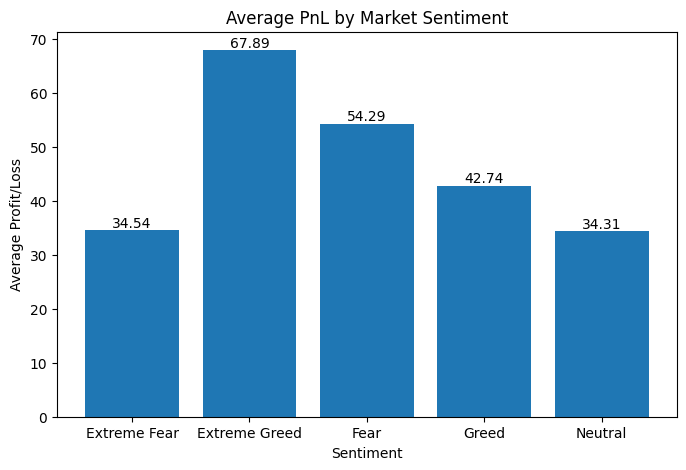

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
bars = plt.bar(
    sentiment_analysis['Sentiment'],
    sentiment_analysis['PnL']
)
plt.title("Average PnL by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Profit/Loss")
#Annotate
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/ds_abirami/outputs/avg_pnl_by_sentiment.png",
            dpi=300,
            bbox_inches='tight')
plt.show()

TRADE COUNT BY SENTIMENT

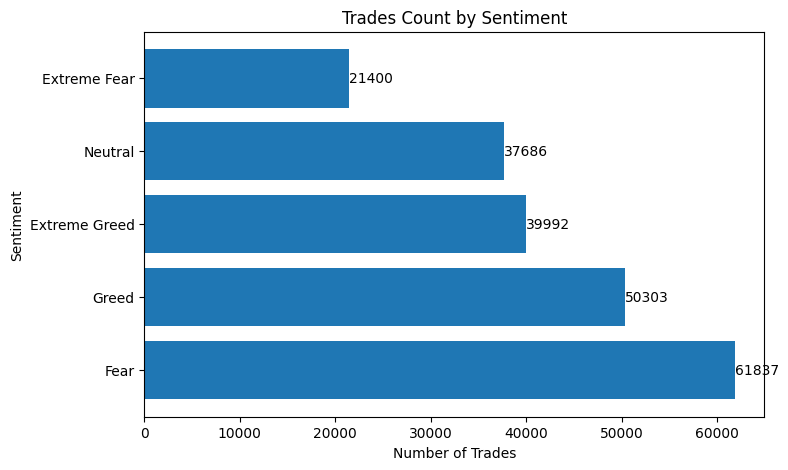

In [37]:
plt.figure(figsize=(8,5))
bars = plt.barh(
    sentiment_count['Sentiment'],
    sentiment_count['Count']
)
plt.title("Trades Count by Sentiment")
plt.xlabel("Number of Trades")
plt.ylabel("Sentiment")
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f'{int(width)}',
        va='center',
    )
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/ds_abirami/outputs/trade_count_sentiment.png",
            dpi=300,
            bbox_inches='tight')
plt.show()

DAILY AVERAGE PNL REPORT USING LINE CHART


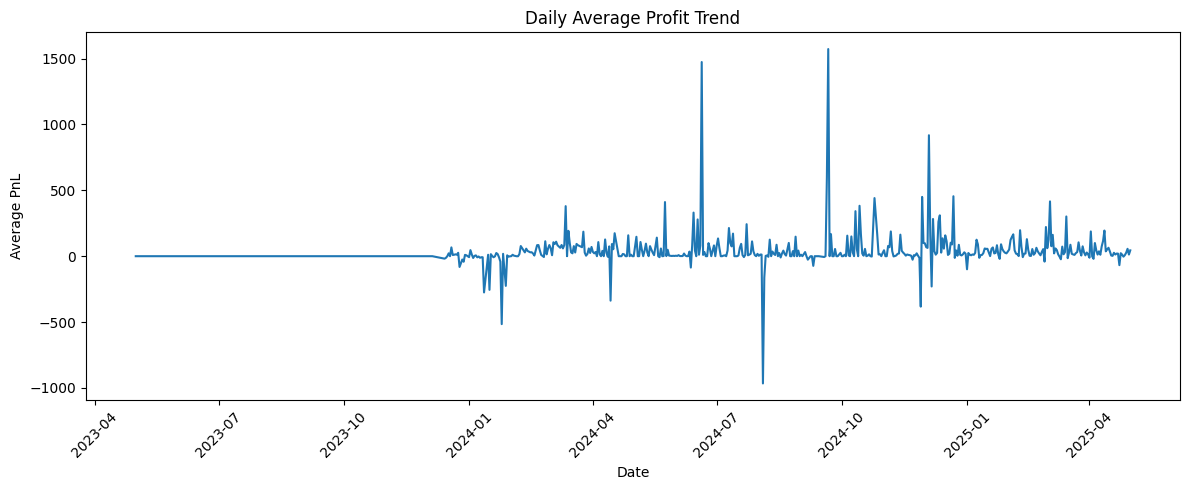

In [38]:
# Daily average PnL
daily_pnl = merged.groupby('Date')['PnL'].mean().reset_index()
plt.figure(figsize=(12,5))
plt.plot(daily_pnl['Date'], daily_pnl['PnL'])
plt.title("Daily Average Profit Trend")
plt.xlabel("Date")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/ds_abirami/outputs/daily_profit_trend.png",
            dpi=300,
            bbox_inches='tight')
plt.show()

MARKET SENTIMENT DISTRIBUTION (FEAR Vs GREED)

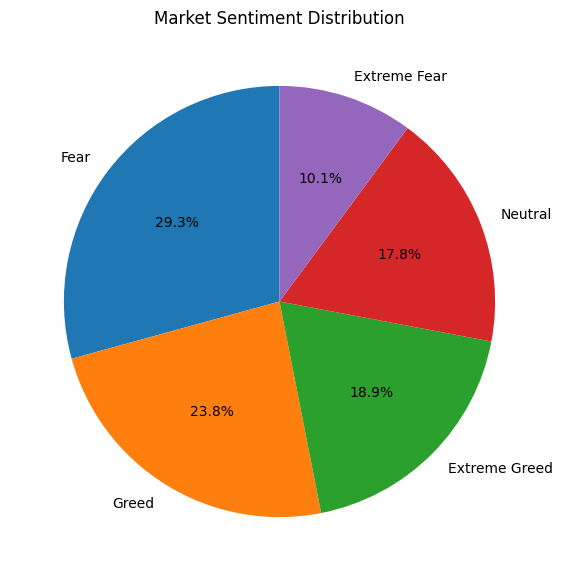

In [39]:
plt.figure(figsize=(7,7))
plt.pie(
    sentiment_count['Count'],
    labels=sentiment_count['Sentiment'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Market Sentiment Distribution")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/ds_abirami/outputs/sentiment_distribution.png",
            dpi=300,
            bbox_inches='tight')
plt.show()

PLOTLY FOR VISUAL ANIMATED GRAPHS



In [32]:
import plotly.express as px
merged_sorted = merged.sort_values('Date')
sample_data = merged_sorted.sample(20000, random_state=42)

In [26]:
import plotly.express as px
merged_sorted = merged.sort_values('Date')
sample_data = merged_sorted.sample(20000, random_state=42)

In [51]:
!pip install --upgrade kaleido

In [49]:
import plotly.express as px
merged_sorted = merged.sort_values('Date')
sample_data = merged_sorted.sample(12000, random_state=42)
fig = px.scatter(
    sample_data,
    x='Date',
    y='PnL',
    color='Sentiment',
    animation_frame=sample_data['Date'].dt.strftime('%Y-%m'),
    title='PnL vs Market Sentiment Over Time',
    labels={
        'Date': 'Date',
        'PnL': 'Profit / Loss'
    },
    size_max=8
)
fig.update_layout(
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {
                "label": "Play",
                "method": "animate",
                "args": [
                    None,
                    {
                        "frame": {"duration": 1200, "redraw": True},  # speed here
                        "fromcurrent": True,
                        "transition": {"duration": 600}
                    }
                ]
            }
        ]
    }]
)
fig.show()

GENERATE AUTO REPORT FILE


In [55]:
!pip install fpdf

In [33]:
from fpdf import FPDF

# Summary values
total_records = len(merged)
avg_pnl = merged.groupby('Sentiment')['PnL'].mean()

# Create PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Trader Behavior & Market Sentiment Analysis", ln=True, align="C")
pdf.ln(10)

# Basic Info
pdf.set_font("Arial", "", 12)
pdf.cell(0, 8, "Name: Abirami R", ln=True)
pdf.cell(0, 8, "Role: Data Science Assignment", ln=True)
pdf.ln(5)

# Introduction
pdf.set_font("Arial", "B", 13)
pdf.cell(0, 8, "1. Introduction", ln=True)

pdf.set_font("Arial", "", 11)
pdf.multi_cell(0, 7,
    "This project analyzes the relationship between market sentiment and trader performance "
    "to understand how emotions influence trading profitability."
)
pdf.ln(3)

# Dataset
pdf.set_font("Arial", "B", 13)
pdf.cell(0, 8, "2. Dataset Description", ln=True)

pdf.set_font("Arial", "", 11)
pdf.multi_cell(0, 7,
    f"Two datasets were used: historical trading data and fear-greed index data. "
    f"The merged dataset contains over {total_records:,} trading records."
)
pdf.ln(3)

# Methodology
pdf.set_font("Arial", "B", 13)
pdf.cell(0, 8, "3. Methodology", ln=True)

pdf.set_font("Arial", "", 11)
pdf.multi_cell(0, 7,
    "Analysis was performed using Python with Pandas, NumPy, Matplotlib, and Plotly. "
    "Data cleaning, merging, visualization, and insight generation were conducted."
)
pdf.ln(3)

# Insights
pdf.set_font("Arial", "B", 13)
pdf.cell(0, 8, "4. Key Insights", ln=True)

pdf.set_font("Arial", "", 11)

for i, (k, v) in enumerate(avg_pnl.items(), 1):
    pdf.multi_cell(
        0, 7,
        f"{i}. During {k} periods, average profit was {v:.2f}."
    )

pdf.multi_cell(
    0, 7,
    "Market sentiment significantly impacts trading performance."
)
pdf.ln(3)
# Visualization
pdf.set_font("Arial", "B", 13)
pdf.cell(0, 8, "5. Data Visualization", ln=True)

pdf.set_font("Arial", "", 11)
pdf.multi_cell(0, 7,
    "Bar charts, line charts, pie charts, and animated scatter plots were used "
    "to analyze sentiment and performance trends."
)
pdf.ln(3)
# Conclusion
pdf.set_font("Arial", "B", 13)
pdf.cell(0, 8, "6. Conclusion", ln=True)
pdf.set_font("Arial", "", 11)
pdf.multi_cell(0, 7,
    "Positive market sentiment leads to higher profitability. "
    "This analysis can help traders make data-driven decisions."
)
pdf.ln(3)
# Future Scope
pdf.set_font("Arial", "B", 13)
pdf.cell(0, 8, "7. Future Scope", ln=True)
pdf.set_font("Arial", "", 11)
pdf.multi_cell(0, 7,
    "Future work can include machine learning models, deeper risk analysis, "
    "and real-time sentiment monitoring."
)
# Save file
file_path = "/content/drive/MyDrive/Colab Notebooks/ds_abirami/ds_report_auto.pdf"
pdf.output(file_path)

file_path

'/content/drive/MyDrive/Colab Notebooks/ds_abirami/ds_report_auto.pdf'